In [22]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [23]:
mydata=pd.read_csv("cyberbullying_tweets.csv")
mydata.head(20)


,tweet_text,cyberbullying_type,rand()
0,@krainboltgreene didn't mention your name. i c...,other_cyberbullying,0.563639
1,"Oh Jesus, more instant restaurants 😲🔫 #mkr",not_cyberbullying,0.556523
2,@DannyVelasco @philippenis Just like the moon ...,not_cyberbullying,0.432574
3,"Wow. Really? RT @tayyoung_: FUCK OBAMA, dumb a...",ethnicity,0.235122
4,Like your vote mattered.... BITCH! RT @tayyoun...,ethnicity,0.011536
5,@JacePro i'm not honestly certain how i feel a...,other_cyberbullying,0.759515
6,I wish school was as easy as half the girls in...,not_cyberbullying,0.064512
7,can u lend me your heart ?,not_cyberbullying,0.014537
8,Sometimes I just sit and wonder whose armpits ...,ethnicity,0.006994
9,@jSoMsIhTuHa I am no bully!,other_cyberbullying,0.135927


In [24]:
mydata["cyberbullying_type"].value_counts()/mydata.shape[0]
mydata["cb_type_num"] = pd.factorize(mydata["cyberbullying_type"])[0]+1
#mydata.head(20)

In [25]:
mydata_final=mydata[["tweet_text","cb_type_num"]]
mydata_final.head(20)

,tweet_text,cb_type_num
0,@krainboltgreene didn't mention your name. i c...,1
1,"Oh Jesus, more instant restaurants 😲🔫 #mkr",2
2,@DannyVelasco @philippenis Just like the moon ...,2
3,"Wow. Really? RT @tayyoung_: FUCK OBAMA, dumb a...",3
4,Like your vote mattered.... BITCH! RT @tayyoun...,3
5,@JacePro i'm not honestly certain how i feel a...,1
6,I wish school was as easy as half the girls in...,2
7,can u lend me your heart ?,2
8,Sometimes I just sit and wonder whose armpits ...,3
9,@jSoMsIhTuHa I am no bully!,1


In [26]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [27]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = mydata_final.tweet_text # the column text contains textual data to extract features from
y = mydata_final.cb_type_num # this is the column we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(47692,) (47692,)
(35769,) (35769,)
(11923,) (11923,)


In [28]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
# i.e., the dimension of our feature vector is 49753!

(35769, 64400) (11923, 64400)


In [29]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm
y_pred_class

CPU times: user 27.6 ms, sys: 953 µs, total: 28.6 ms
Wall time: 29.5 ms


array([5, 6, 4, ..., 1, 1, 3])

Accuracy:  76.14
[0.47022587 0.36638148 0.91285297 0.97980818 0.84738748 0.98019802]
0.7613855573261763


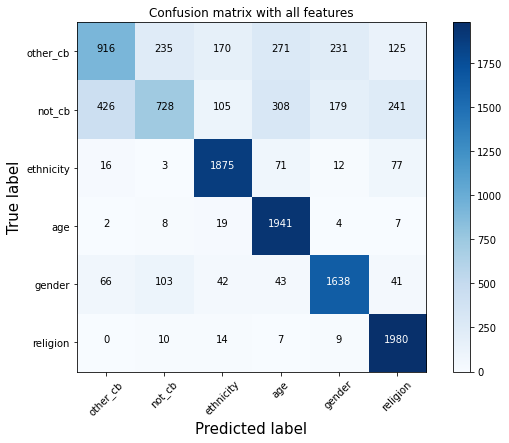

In [30]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score, recall_score,precision_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", round(accuracy_score(y_test, y_pred_class)*100,2))
#print(precision_score(y_test, y_pred_class, average=None))
p=precision_score(y_test, y_pred_class, average='weighted')
#q=precision_score(y_test, y_pred_class, average='weighted')
r=recall_score(y_test, y_pred_class, average=None)
print(r)
s=recall_score(y_test, y_pred_class, average='weighted')
print(s)
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['other_cb','not_cb','ethnicity','age','gender','religion'],normalize=False,
                      title='Confusion matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm)
#print(y_test)
#print(y_pred_prob)
#print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob,multi_class = 'ovr'))

In [32]:

t1_check = "She was bullied at school"
t2_check = "stop bullying please"
clean(t1_check)
t1=[t1_check]
t1 = vect.transform(t1)
y_ch = nb.predict(t1)

labels = ['other_cb','not_cb','ethnicity','age','gender','religion']
print(t1_check, " is ", "\'",labels[y_ch[0]-1], "\'"," type of bullying")

clean(t2_check)
t2=[t2_check]
t2 = vect.transform(t2)
y_ch = nb.predict(t2)
print(t2_check, " is ","\'",labels[y_ch[0]-1],"\'", " type of bullying")

She was bullied at school  is  ' age '  type of bullying
stop bullying please  is  ' not_cb '  type of bullying
